In [51]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [52]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [53]:
x_train,y_train = train['features'],train['labels']
x_valid,y_valid = valid['features'],valid['labels']
x_test,y_test = test['features'],test['labels']

In [54]:
x_train.shape

(34799, 32, 32, 3)

In [55]:
y_train.shape

(34799,)

14

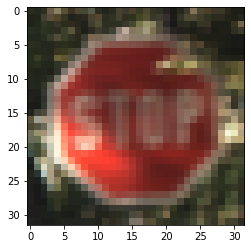

In [56]:
i = np.random.randint(1, len(x_train))
plt.imshow(x_train[i])
y_train[i]

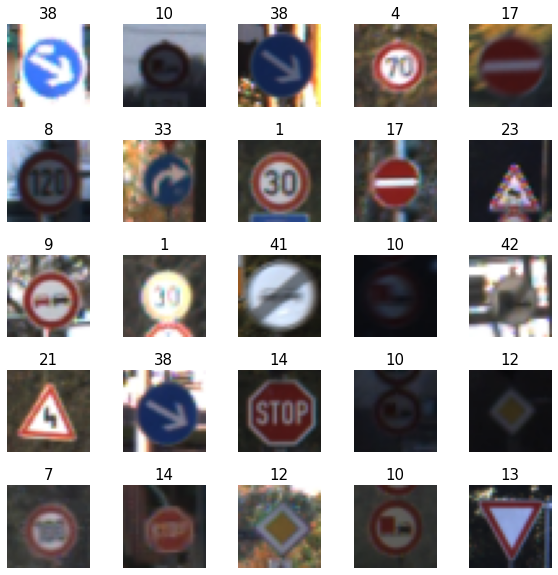

In [57]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(x_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0,W_grid * L_grid):
    index = np.random.randint(0, n_training)
    # Select a random number
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index] , fontsize=15)
    axes[i].axis('off')
    # read and display an image with the selected index    
plt.subplots_adjust(hspace=0.4)

        

In [58]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [59]:
x_train_gray = np.sum(x_train/3,axis=3 , keepdims = True)
x_test_gray = np.sum(x_test/3,axis=3 , keepdims = True)
x_valid_gray = np.sum(x_valid/3,axis=3 , keepdims = True)

In [60]:
x_train_gray.shape

(34799, 32, 32, 1)

In [61]:
x_train_gray_norm = (x_train_gray -128)/128
x_test_gray_norm = (x_test_gray -128)/128
x_valid_gray_norm = (x_valid_gray -128)/128

In [62]:
x_train_gray_norm

array([[[[-0.65625   ],
         [-0.58072917],
         [-0.58854167],
         ...,
         [-0.52604167],
         [-0.65885417],
         [-0.5703125 ]],

        [[-0.71354167],
         [-0.609375  ],
         [-0.61197917],
         ...,
         [-0.46614583],
         [-0.69010417],
         [-0.54427083]],

        [[-0.73177083],
         [-0.68229167],
         [-0.63802083],
         ...,
         [-0.40885417],
         [-0.6640625 ],
         [-0.50520833]],

        ...,

        [[-0.79427083],
         [-0.46354167],
         [-0.53125   ],
         ...,
         [-0.52604167],
         [-0.52083333],
         [-0.61197917]],

        [[-0.8203125 ],
         [-0.7109375 ],
         [-0.69791667],
         ...,
         [-0.6171875 ],
         [-0.55989583],
         [-0.58854167]],

        [[-0.81510417],
         [-0.73958333],
         [-0.734375  ],
         ...,
         [-0.61197917],
         [-0.51822917],
         [-0.5546875 ]]],


       [[[ 0.9921875 ],


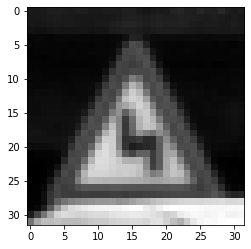

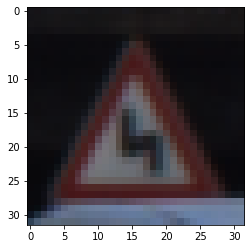

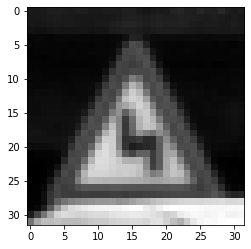

In [24]:
i = random.randint(1, len(x_train_gray))
plt.imshow(x_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze(), cmap = 'gray')

In [63]:
from tensorflow.keras import datasets, layers, models
CNN = models.Sequential()

CNN.add(layers.Conv2D(6,(5,5), activation='relu', input_shape = (32,32,1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16,(5,5), activation='relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation='relu'))
CNN.add(layers.Dense(84, activation='relu'))
CNN.add(layers.Dense(43, activation='softmax'))
CNN.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_10 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_11 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 120)              

In [64]:
CNN.compile(optimizer = 'Adam' , loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [67]:
history = CNN.fit(x_train_gray_norm, y_train, batch_size=500, epochs=20, 
                  verbose=1, validation_data=(x_valid_gray_norm, y_valid))

Train on 34799 samples, validate on 4410 samples
Epoch 1/20
34799/34799 [==============================] - 23s 661us/sample - loss: 0.5762 - accuracy: 0.8363 - val_loss: 0.6037 - val_accuracy: 0.8261
Epoch 2/20
34799/34799 [==============================] - 23s 665us/sample - loss: 0.5278 - accuracy: 0.8482 - val_loss: 0.5891 - val_accuracy: 0.8329
Epoch 3/20
34799/34799 [==============================] - 23s 671us/sample - loss: 0.4780 - accuracy: 0.8632 - val_loss: 0.5316 - val_accuracy: 0.8515
Epoch 4/20
34799/34799 [==============================] - 23s 668us/sample - loss: 0.4376 - accuracy: 0.8775 - val_loss: 0.5259 - val_accuracy: 0.8519
Epoch 5/20
34799/34799 [==============================] - 23s 663us/sample - loss: 0.4002 - accuracy: 0.8881 - val_loss: 0.5020 - val_accuracy: 0.8558
Epoch 6/20
34799/34799 [==============================] - 23s 668us/sample - loss: 0.3735 - accuracy: 0.8958 - val_loss: 0.4712 - val_accuracy: 0.8653
Epoch 7/20
34799/34799 [=====================

In [68]:
score = CNN.evaluate(x_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 6s 442us/sample - loss: 0.5222 - accuracy: 0.8899
Test Accuracy: 0.8899445533752441


In [69]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [70]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Loss')

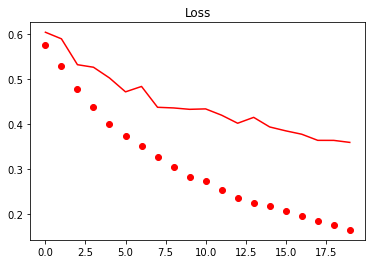

In [71]:
epochs = range(len(accuracy))
plt.plot(epochs, loss ,'ro', label='Training loss')
plt.plot(epochs, val_loss ,'r', label='Validation loss')
plt.title('Loss')

Text(0.5, 1.0, 'Accuracy')

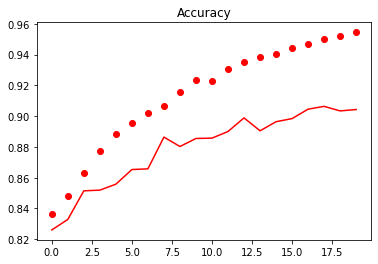

In [72]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy ,'ro', label='Training accuracy')
plt.plot(epochs, val_accuracy ,'r', label='Validation accuracy')
plt.title('Accuracy')

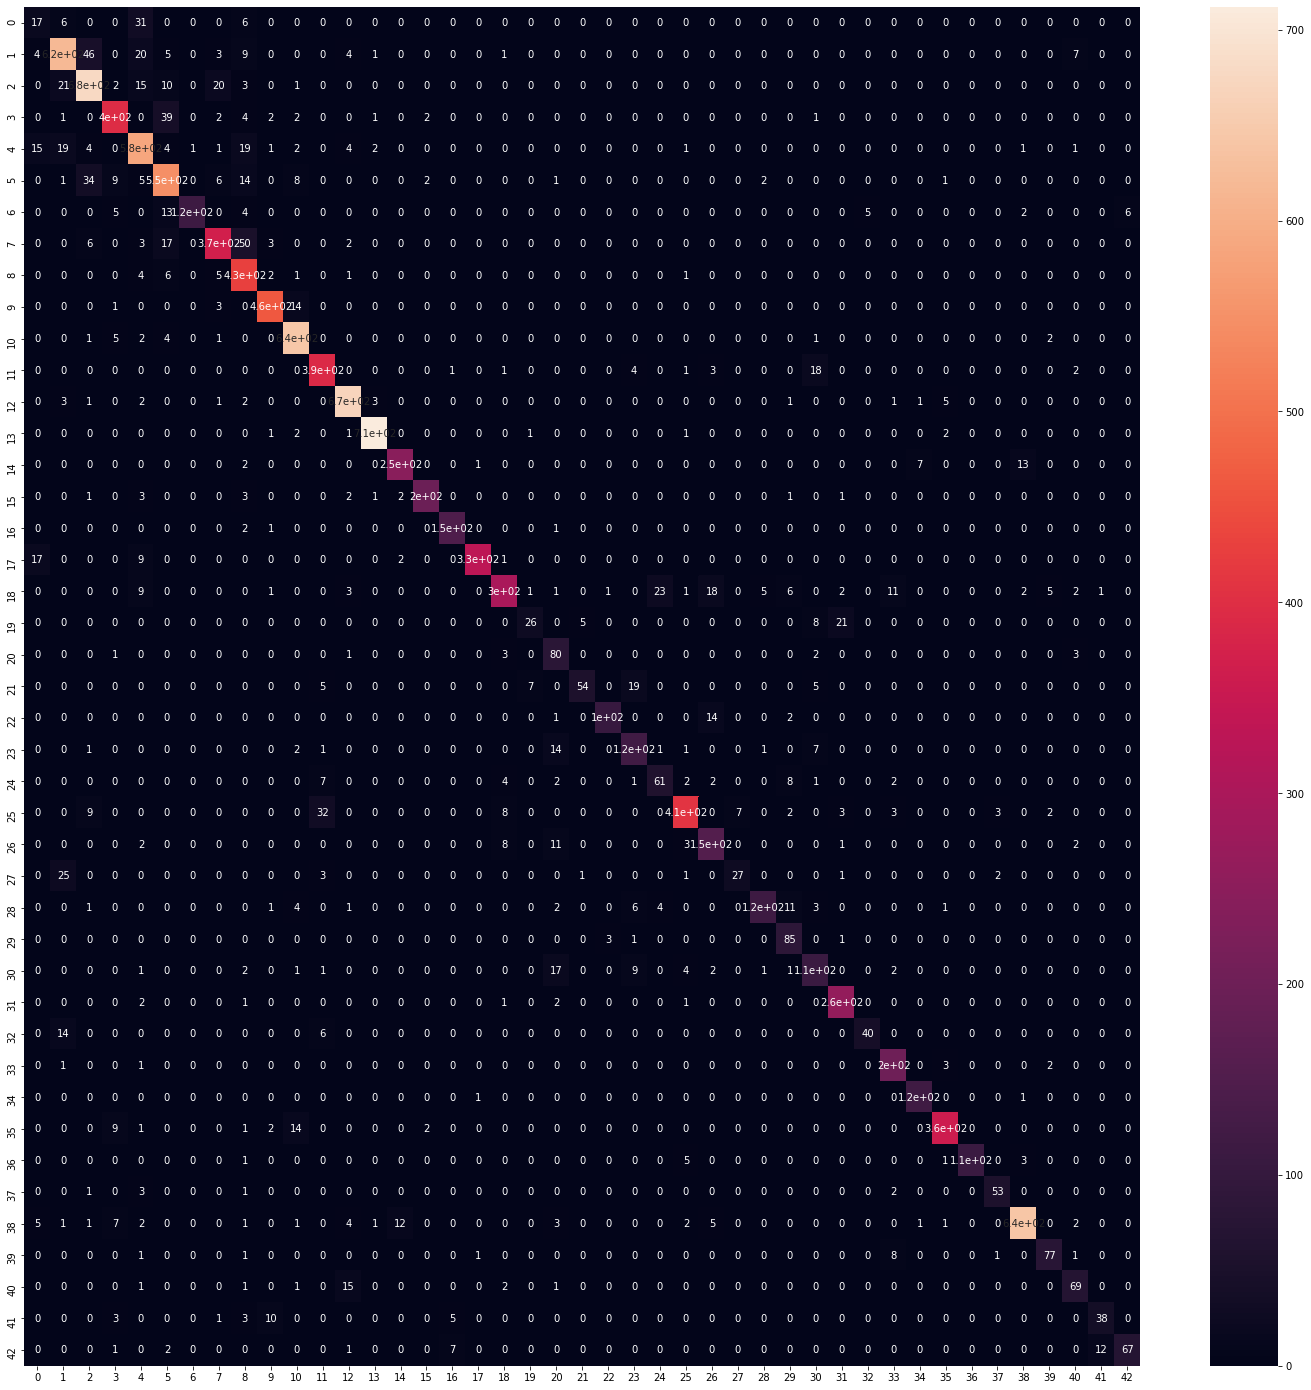

In [73]:
predicted_classes = CNN.predict_classes(x_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

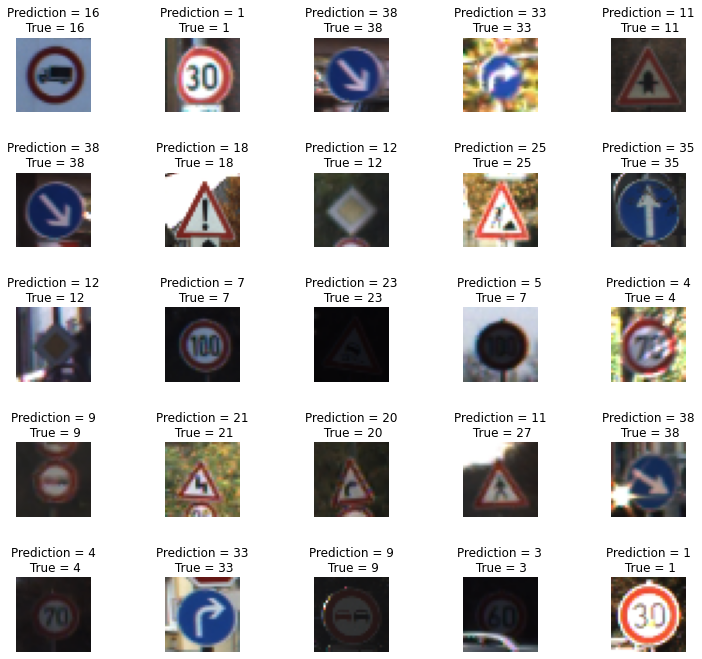

In [74]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

# APPENDIX

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }